In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

### Reading the Data

In [2]:
data = pd.read_csv("students_marks_hours.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Understanding the Data

In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
x = data.iloc[:,:1]
y = data.iloc[:,1:2]

### Visualizing the Data

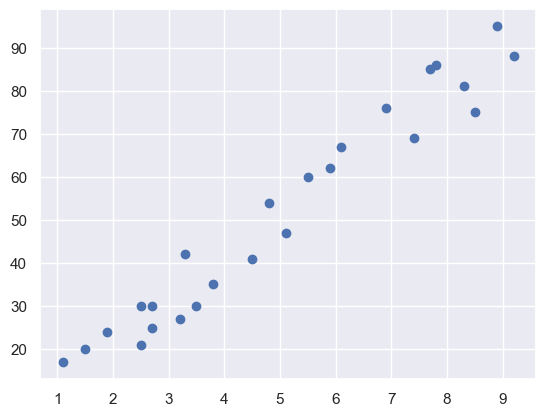

In [5]:
plt.scatter(x,y)

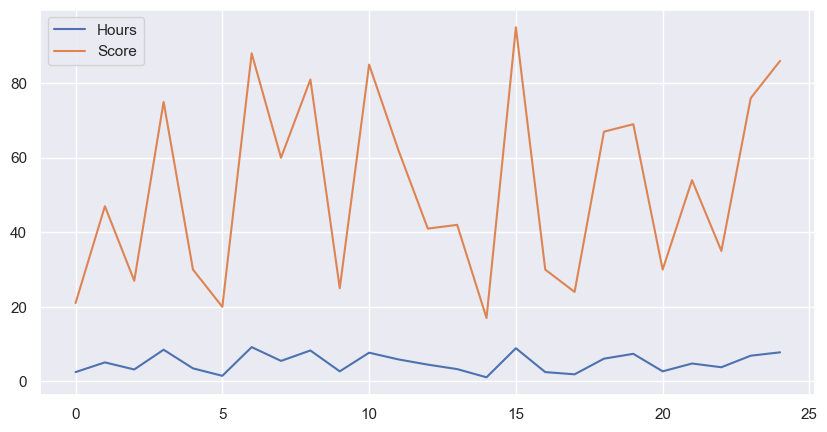

In [6]:
plt.figure(figsize=(10,5))
plt.plot(data.Hours,label='Hours')
plt.plot(data.Scores,label='Score')
plt.legend()
plt.show()

<Axes: >

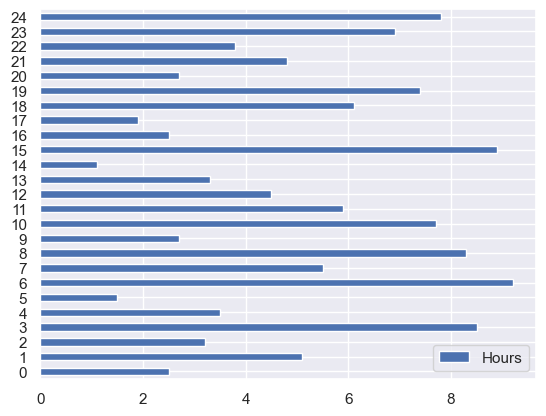

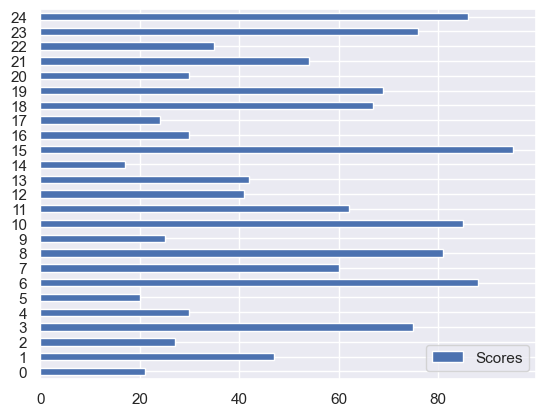

In [7]:
x.plot(kind='barh')
y.plot(kind='barh')

### Dividing the Data into Training and Test Data

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

### training the Model

In [9]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

### Creating a Linear Regression Line

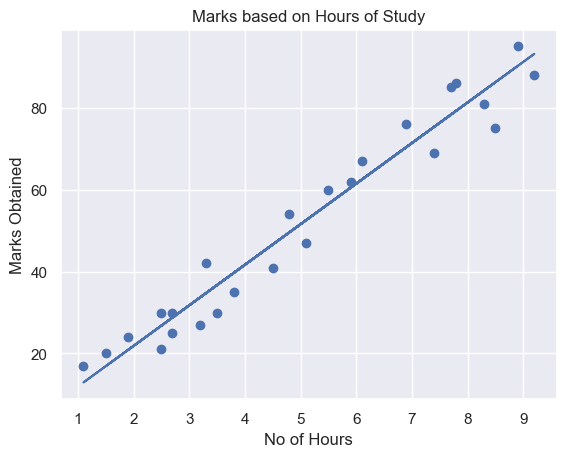

In [10]:
line = lr.intercept_ + lr.coef_*x
plt.scatter(x,y)
plt.plot(x,line)
plt.xlabel('No of Hours')
plt.ylabel('Marks Obtained')
plt.title('Marks based on Hours of Study')
plt.show()

### Predicting the Data and Calculating the Difference between Actual and Predicted Value

In [11]:
predictions = lr.predict(xtest)
Actual_predict = pd.DataFrame(columns=['Actual','Predictions','Error'])
Actual_predict['Actual'] = ytest
Actual_predict['Predictions'] = predictions
Actual_predict['Error'] = ytest - predictions
Actual_predict

,Actual,Predictions,Error
5,20,16.884145,3.115855
2,27,33.732261,-6.732261
19,69,75.357018,-6.357018
16,30,26.794801,3.205199
11,62,60.491033,1.508967


### Calculating the Accuracy and Error in the Model

In [12]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2 = r2_score(ytest,predictions)
mse = mean_squared_error(ytest,predictions)
mae = mean_absolute_error(ytest,predictions)
print('R2 : ->' , r2 , ',MSE : ->',mse , ',MAE : ->',mae)

R2 : -> 0.9454906892105355 ,MSE : -> 21.598769307217406 ,MAE : -> 4.183859899002975


<Axes: ylabel='Actual'>

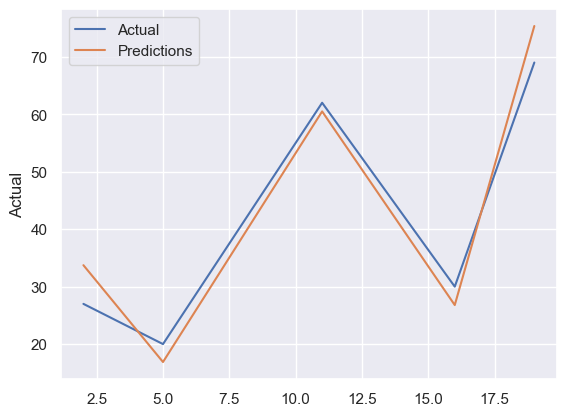

In [13]:
sns.lineplot(Actual_predict['Actual'],label='Actual')
sns.lineplot(Actual_predict['Predictions'],label='Predictions')

### Predicting Percentage Scored for Studing 9.25 Hours

In [15]:
# Ensure the prediction is within the range of 0 to 100
def constrained_prediction(hours):
    predicted_score = lr.predict([[hours]])[0]
    return min(max(predicted_score, 0), 100)

# Predict the score with the constraint applied
constrained_score = constrained_prediction(9.25)
print(f'Constrained predicted score for studying 9.25 hours/day: {constrained_score}')


Constrained predicted score for studying 9.25 hours/day: [93.69173249]
